<a href="https://colab.research.google.com/github/Mrdaimi/Data-Science/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人造数据集生成

In [ ]:
import random
import torch
def synthetic_data(w,b,num_examples):
  """生成 y=Xw+b+噪声 噪声为一个范围内的随机数"""
  """normal表示生成一个矩阵，矩阵中每个元素符合内部的平均值和方差"""
  X=torch.normal(0,1,(num_examples,len(w)))
  y=torch.matmul(X,w)+b
  y+=torch.normal(0,0.01,y.shape)
  """reshape表示张量的形状,其中-1=n=张量总个数/其他参数  实际上这个参数就是用来偷懒的"""
  return X,y.reshape((-1,1))
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

# 获取若干组行高为batch_size的随机特征矩阵和标签
def data_iter(batch_size,features,labels):
  num_examples=len(features)
  indices=list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
    yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,labels):
  print(X,'\n',y)
  break

# 开始真正的模型预测  假设该模型为线性回归模型
# 定义初始化参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

# 定义模型
def linreg(X,w,b):
  return torch.matmul(X,w)+b

# 定义损失函数  y_hat和y都是标量 表示一个样本的损失
def squared_loss(y_hat,y):
  return (y_hat-y.reshape(y_hat.shape))**2/2

# 定义优化方法: 小批量随机梯度下降
# torch.no_grad表示计算梯度的过程中不需要跟踪记录梯度=》不这样做可能导致显存爆炸
def sgd(params,lr,batch_size):
  with torch.no_grad():
    for param in params:
      param-=lr*param.grad/batch_size
      param.grad.zero_()

# 训练过程
# num_epochs表示扫描数据遍数
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    l=loss(net(X,w,b),y)
    l.sum().backward()
    sgd([w,b],lr,batch_size)
  with torch.no_grad:
    train_l=loss(net(features,w,b),labels)


tensor([[-0.3013,  0.3753],
        [-2.2080,  0.0507],
        [ 1.1893, -0.9462],
        [-0.7892,  1.9404],
        [ 0.2290, -2.2593],
        [ 0.5566,  1.5916],
        [-0.4687, -0.0964],
        [ 0.7745,  0.1619],
        [-0.1776, -0.9221],
        [ 1.7795, -1.0957]]) 
 tensor([[ 2.3103],
        [-0.3738],
        [ 9.7916],
        [-3.9798],
        [12.3478],
        [-0.1185],
        [ 3.5863],
        [ 5.2060],
        [ 6.9919],
        [11.4688]])


# reshape的-1参数测试

# 波士顿房价预测

一元线性回归 (numpy实现)


i:0, Train Loss:204.63867454656884, Test Loss:64.58993562314672, w:0.5993406456217476 ,b:2.2254911612071355
i:100, Train Loss:28.32616426302031, Test Loss:43.13585083753231, w:3.5493391501974143 ,b:2.183823029217225
i:200, Train Loss:28.086868896194176, Test Loss:42.97258930557071, w:3.6246811828153755 ,b:1.7004691024741447
i:300, Train Loss:27.853639208047916, Test Loss:42.813557437395566, w:3.6990621983327365 ,b:1.2232805441595715
i:400, Train Loss:27.626321445258434, Test Loss:42.65864685461147, w:3.772494454898575 ,b:0.752178712587248
i:500, Train Loss:27.404765751854562, Test Loss:42.50775194086151, w:3.844990054304481 ,b:0.28708596917638707
i:600, Train Loss:27.188826070426636, Test Loss:42.36076977162537, w:3.9165609439789595 ,b:-0.172074334343326
i:700, Train Loss:26.97836004584023, Test Loss:42.21760004579963, w:3.9872189189563914 ,b:-0.6253778685635326
i:800, Train Loss:26.77322893139063, Test Loss:42.07814501901421, w:4.056975623820878 ,b:-1.0728993388678754
i:900, Train Los

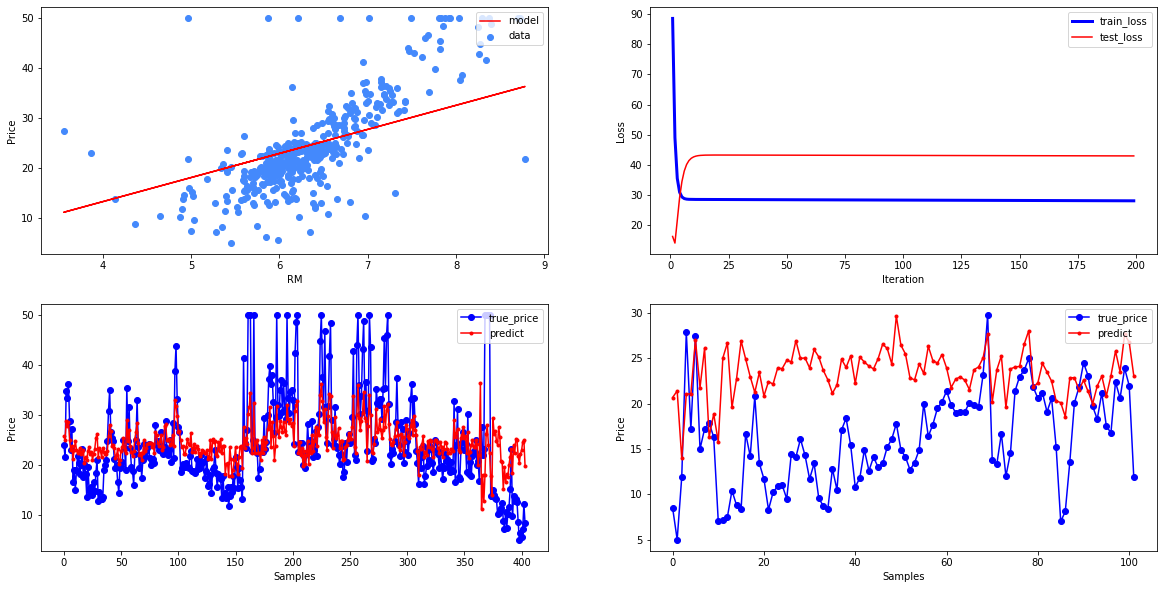

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/DataSet/artificial intelligence/boston_house_prices.csv')
housing=np.array(data)


# target的数据列
target=housing[:,13]
# feature:RM的数据列
feature=housing[:,5]
# 切割线:split_num trainset为0.8 testset为0.2
split_num=int(len(feature)*0.8)
# 训练数据集
x_train=feature[:split_num]
y_train=target[:split_num]
# 测试数据集
x_test=feature[split_num:]
y_test=target[split_num:]

# 设置超参数
learn_rate=0.01
iter=2000
# 设置参数
np.random.seed(200)
w=np.random.randn()
b=np.random.randn()
# 每次迭代后的损失值(包括训练集和测试集)
mse_train=[]
mse_test=[]

for i in range(iter):
  # w,b的偏导
  dL_dw=np.mean(x_train*(w*x_train+b-y_train))
  dL_db=np.mean(w*x_train+b-y_train)
  # 更新w,b
  w=w-learn_rate*dL_dw
  b=b-learn_rate*dL_db
  # 观察更新后的w,b是否收敛
  pred_train=w*x_train+b
  loss_train=np.mean(np.square(y_train-pred_train))/2
  mse_train.append(loss_train)

  pred_test=w*x_test+b
  loss_test=np.mean(np.square(y_test-pred_test))/2
  mse_test.append(loss_test)
  # 每100次显示一下误差
  if i%100==0:
    print('i:{}, Train Loss:{}, Test Loss:{}, w:{} ,b:{}'.format(
        i,mse_train[i],mse_test[i],w,b
    ))

# 数据可视化
plt.figure(figsize=(20,10))

# 第1幅图：RM属性和房价的散点图，RM和预测房价的折线图。两者差不多吻合的程度越高，说明误差越小。
plt.subplot(221)
plt.scatter(x_train,y_train,color='#4489fc',label='data')
plt.plot(x_train,pred_train,color='red',label='model')
plt.xlabel("RM")
plt.ylabel("Price")
# 图例的位置
plt.legend(loc='upper right')

# 第2幅图：次数-损失折线图(曲线图)
plt.subplot(222)
# lw表示linewidth
plt.plot(range(1,200),mse_train[1:200],color='blue',lw=3,label='train_loss')
plt.plot(range(1,200),mse_test[1:200],color='red',lw=1.5,label='test_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# 第3幅图：训练集中预测值和实际值的差距，用点线图表示   数据的顺序为横轴
plt.subplot(223)
plt.plot(y_train,color='blue',marker='o',label='true_price')
plt.plot(pred_train,color='red',marker='.',label='predict')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend(loc='upper right')

# 第4幅图：测试集中预测值和实际值的差距，用点线图表示   数据的顺序为横轴
plt.subplot(224)
plt.plot(y_test,color='blue',marker='o',label='true_price')
plt.plot(pred_test,color='red',marker='.',label='predict')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

多元线性回归 (numpy实现)


[[6.575  4.09   1.    ]
 [6.421  4.9671 1.    ]
 [7.185  4.9671 1.    ]
 ...
 [6.343  1.5741 1.    ]
 [6.404  1.639  1.    ]
 [5.349  1.7028 1.    ]] [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.

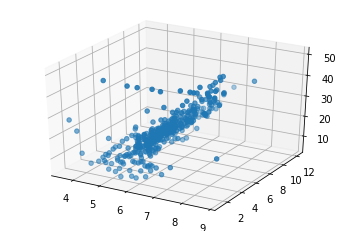

In [ ]:
# 选择两个feature就行
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
data=pd.read_csv('/content/drive/MyDrive/DataSet/artificial intelligence/boston_house_prices.csv')
housing=np.array(data)
warnings.filterwarnings('ignore')

# target的数据列
target=housing[:,13]
# feature:RM,DIS的数据列
feature=housing[:,[5,7]]
# 切割线:split_num trainset为0.8 testset为0.2
split_num=int(len(feature)*0.8)
# 训练数据集
x_train=feature[:split_num,:]
x_train=np.concatenate([x_train,np.ones((split_num,1))],axis=1)
y_train=target[:split_num]
# 测试数据集
x_test=feature[split_num:,:]
x_test=np.concatenate([x_test,np.ones((len(feature)-split_num,1))],axis=1)
y_test=target[split_num:]

# 对x_train,x_test进行规范化：特征缩放
x_train
# 设置超参数
learn_rate=0.01
iter=30
# 设置参数
np.random.seed(200)
# b和w合为一体
w=np.random.randn(3)
# 每次迭代后的损失值(包括训练集和测试集)
mse_train=[]
mse_test=[]
# 规范化 

# 对于n元线性函数，其实可以直接用正规方程来求解，不过这里还是使用梯度下降
# 默认用列向量
print(x_train,y_train)
# for i in range(iter):
#   # w的偏导
#   dL_dw=np.matmul(x_train.T,np.matmul(x_train,w)-y_train) 
#   # 更新w
#   w=w-learn_rate*dL_dw
#   # 观察更新后的w,b是否收敛
#   pred_train=np.matmul(x_train,w)
#   loss_train=np.matmul((y_train-pred_train).T,(y_train-pred_train))/2
#   mse_train.append(loss_train)

#   pred_test=np.matmul(x_test,w)
#   loss_test=np.matmul((y_test-pred_test).T,(y_test-pred_test))/2
#   print(loss_train,2)
#   mse_test.append(loss_test)
  # 每100次显示一下误差
  # if i%100==0:
  #   print('i:{}, Train Loss:{}, Test Loss:{}, w:{} ,b:{}'.format(
  #       i,mse_train[i],mse_test[i],w,b
  #   ))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
Z=torch.normal(0,1,(3,4))
print(Z.size())
print(Z.reshape(-1,2,2).size())
print(Z.size())

torch.Size([3, 4])
torch.Size([3, 2, 2])
torch.Size([3, 4])
